In [1]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# hierchical algorithm from scikit-learn
from sklearn.cluster import AgglomerativeClustering

In [2]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'Country_risk_2019_data.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))
print("\nFirst 5 rows and 5 columns\n",raw .iloc[:5 , :5])

Size of the dataset (row, col):  (121, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2  Argentina     AR          45  1.989  5.087      -3.061
3    Armenia     AM          42  2.294  4.812       6.000
4  Australia     AU          77  1.419  8.363       1.713

First 5 rows and 5 columns
      Country Abbrev  Corruption  Peace  Legal
0    Albania     AL          35  1.821  4.546
1    Algeria     DZ          35  2.219  4.435
2  Argentina     AR          45  1.989  5.087
3    Armenia     AM          42  2.294  4.812
4  Australia     AU          77  1.419  8.363


In [3]:
# check for missing values
check = raw.isna().sum()
check

Country       0
Abbrev        0
Corruption    0
Peace         0
Legal         0
GDP Growth    0
dtype: int64

In [4]:
# Normalization
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.390081 -0.878158    0.126952
1  0.472352 -0.958948   -0.040772
2 -0.026039 -0.484397   -2.230541
3  0.634871 -0.684553    1.303747
4 -1.261182  1.900001   -0.368418


In [5]:
#hierarchical_cluster
hierarchical_cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='average')

In [6]:
y = hierarchical_cluster.fit_predict(X) 
print("cluster labels: ", y)

cluster labels:  [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 1 2 0 0 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2
 0 2 0 0 0 0 0 2 0 1]


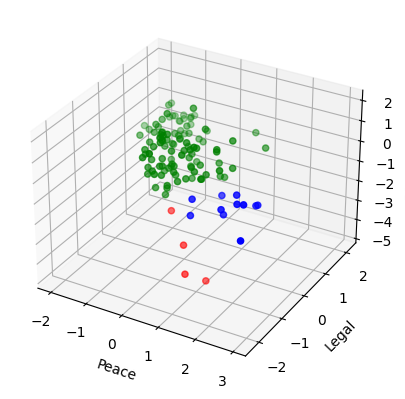

In [8]:
#Visualize the result (3D plot)
# set up the color
cmp = {0:'green',1:'red',2:'blue'}
colors = [cmp[c] for c in y]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=colors, marker='o')


ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()

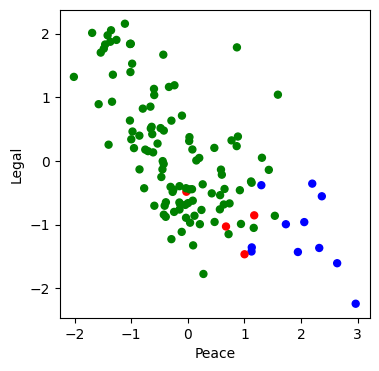

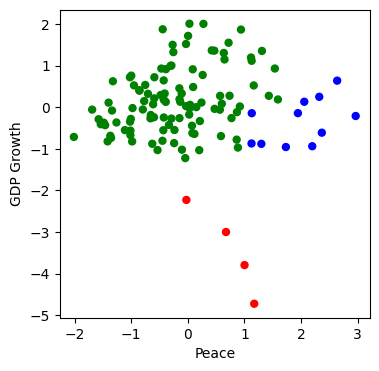

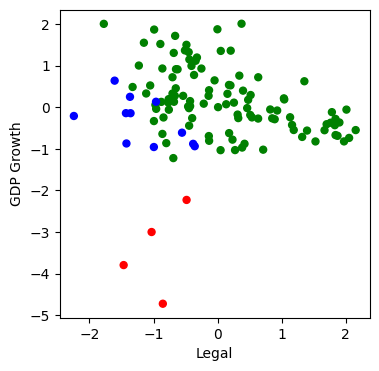

In [9]:
#Visualize the result (3 2D plots)
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i, figsize=(4,4))
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=colors, s=25)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

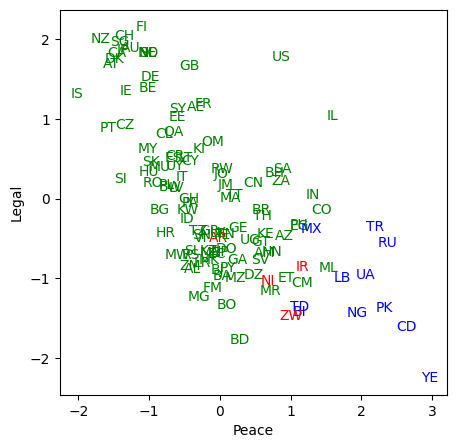

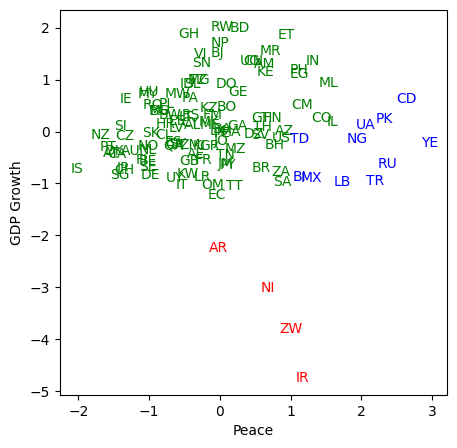

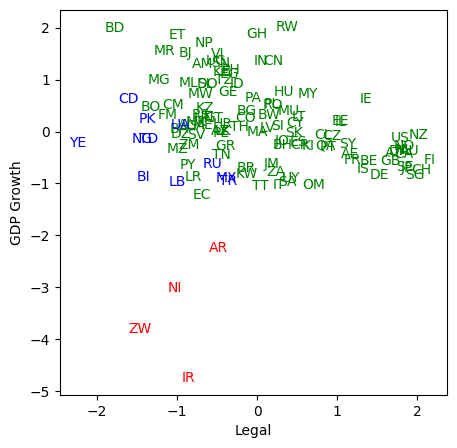

In [9]:
#Visualize the result (3 2D plots)
#plot country abbreviations instead of dots.
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['green','red', 'blue']

for i in range(3):
    fig = plt.figure(i, figsize=(5, 5))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    for j in range(X.shape[0]):
        plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

In [10]:
#List the result
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
result.loc[:, 'Risk'] = result['Label'].replace({0: 'Low', 1: 'High', 2: 'Moderate'})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))

                          Country  ...      Risk
0                         Albania  ...       Low
76                    New Zealand  ...       Low
75                    Netherlands  ...       Low
74                          Nepal  ...       Low
73                     Mozambique  ...       Low
72                        Morocco  ...       Low
71                     Montenegro  ...       Low
70                        Moldova  ...       Low
111                        Uganda  ...       Low
68                      Mauritius  ...       Low
67                     Mauritania  ...       Low
109                       Tunisia  ...       Low
66                           Mali  ...       Low
64                         Malawi  ...       Low
63                     Madagascar  ...       Low
62                      Lithuania  ...       Low
61                        Liberia  ...       Low
119                        Zambia  ...       Low
59                         Latvia  ...       Low
58                  

In [11]:
pd.DataFrame(result).to_csv('hierarchical_results_averagemethod.csv')